In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import warnings
from sklearn.metrics import classification_report

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Import data
df = pd.read_csv("mushrooms.csv")
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [5]:
# Renaming cloumn names
df = df.rename(columns = {"cap-shape":"cap_shape","cap-surface":"cap_surface","cap-color":"cap_color",
                          "gill-attachment":"gill_attachment","gill-spacing":"gill_spacing","gill-size":"gill_size",
                         "gill-color":"gill_color","stalk-shape":"stalk_shape","stalk-root":"stalk_root",
                          "stalk-surface-above-ring":"stalk_surface_above_ring","stalk-surface-below-ring":"stalk_surface_below_ring",
                         "stalk-color-above-ring":"stalk_color_above_ring","stalk-color-below-ring":"stalk_color_below_ring",
                         "veil-type":"veil_type","veil-color":"veil_color","ring-number":"ring_number","ring-type":"ring_type",
                         "spore-print-color":"spore_print_color"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [7]:
# Converting the meaningless represenation of observation into meaningful
stalk_root = {"stalk_root":{"?":"m"}}
df= df.replace(stalk_root)

In [8]:
# Number of rows and columns in dataset
df.shape

(8124, 23)

In [9]:
#Value counts in output variable
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [11]:
df.describe()

class cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring_number ring_type spore_print_color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

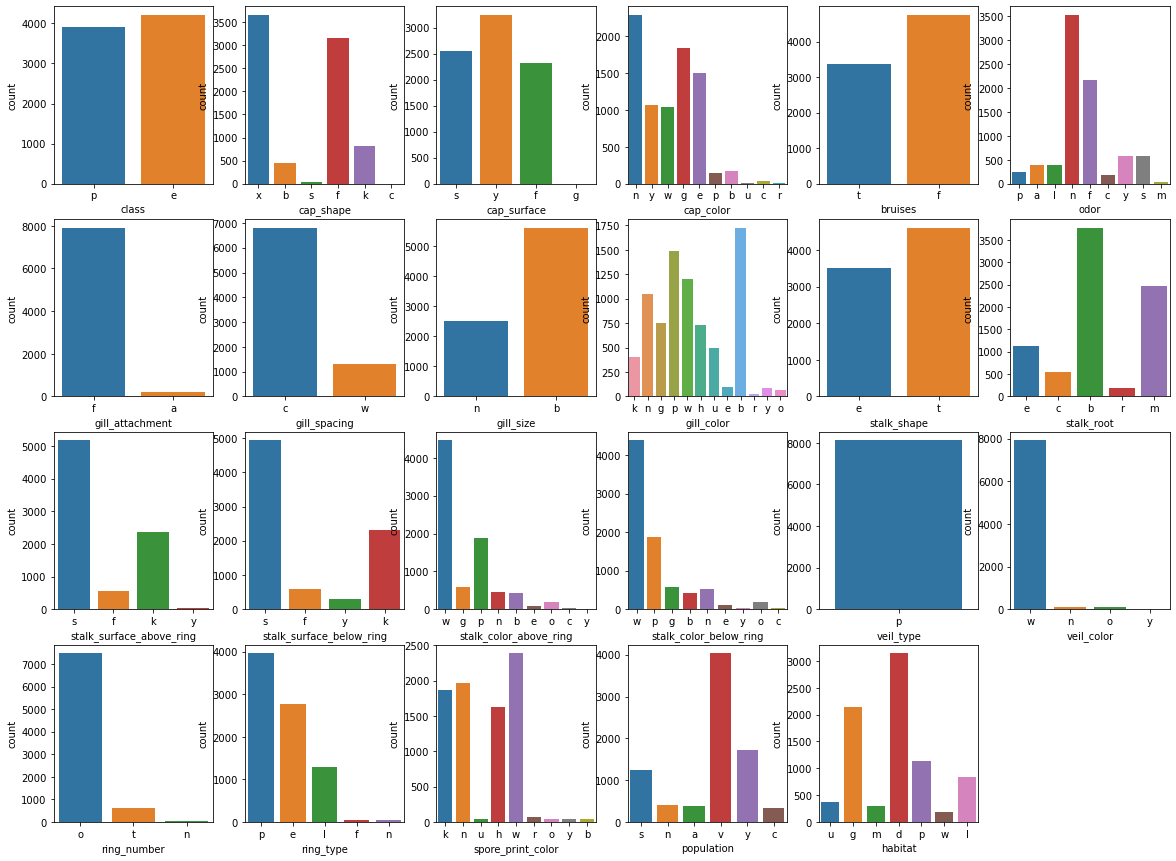

In [12]:
# Visualisation of features in the data
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df:
    # as there are 23 features in the data
    if plotnumber<=23 :     
        ax = plt.subplot(4,6,plotnumber)
        sb.countplot(df[column])
        plt.xlabel(column,fontsize= 10)
        
    plotnumber+=1
plt.show()

In [13]:
# Deleting unnecessay feature
del df['veil_type']

## Visualisation of features in the data with respect to class variable

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Size')

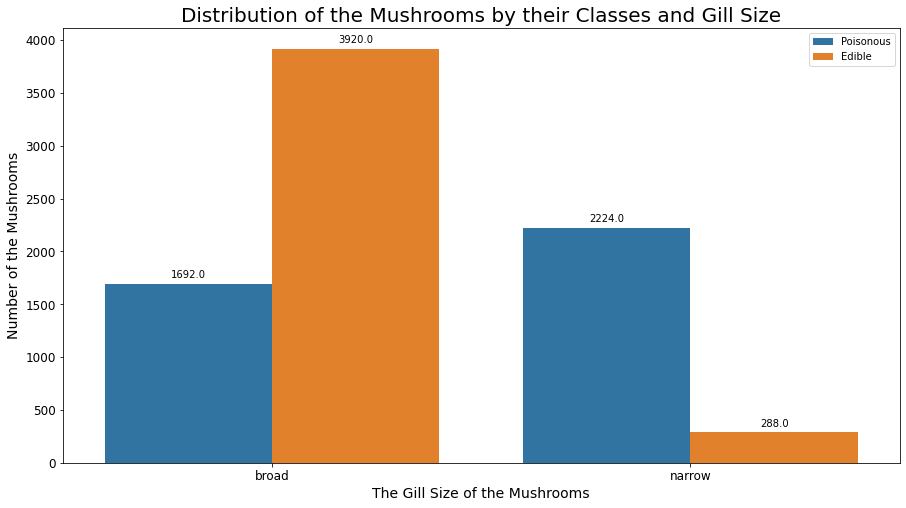

In [15]:
#Distribution of the Mushrooms by their Classes and Gill Size
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='gill_size',
                      hue='class',
                      order=df['gill_size'].value_counts().index)
                      
multi_plot.set_xticklabels(['broad', 'narrow'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Gill Size of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Size', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Root')

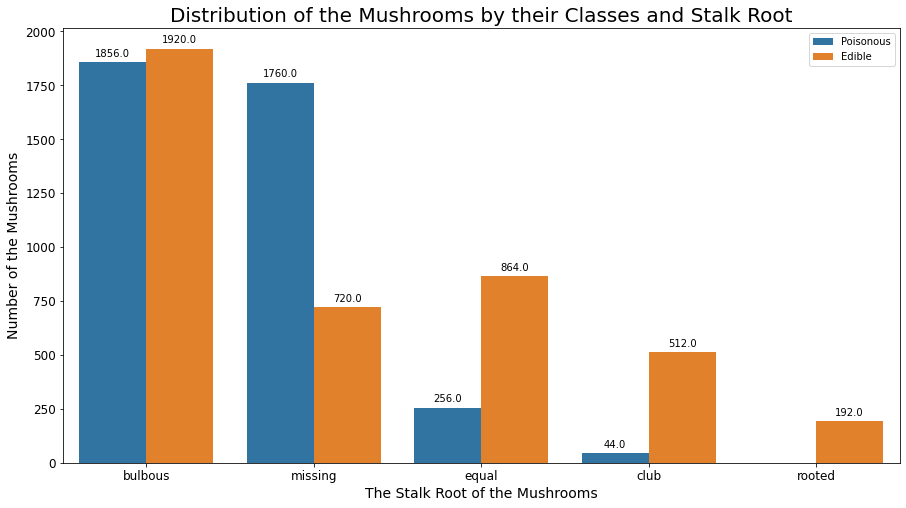

In [47]:
#Distribution of the Mushrooms by their Classes and Stalk Root
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='stalk_root',
                      hue='class',
                      order=df['stalk_root'].value_counts().index)
                      
multi_plot.set_xticklabels(['bulbous', 'missing', 'equal', 'club','rooted'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Stalk Root of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Root', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Surface Below Ring')

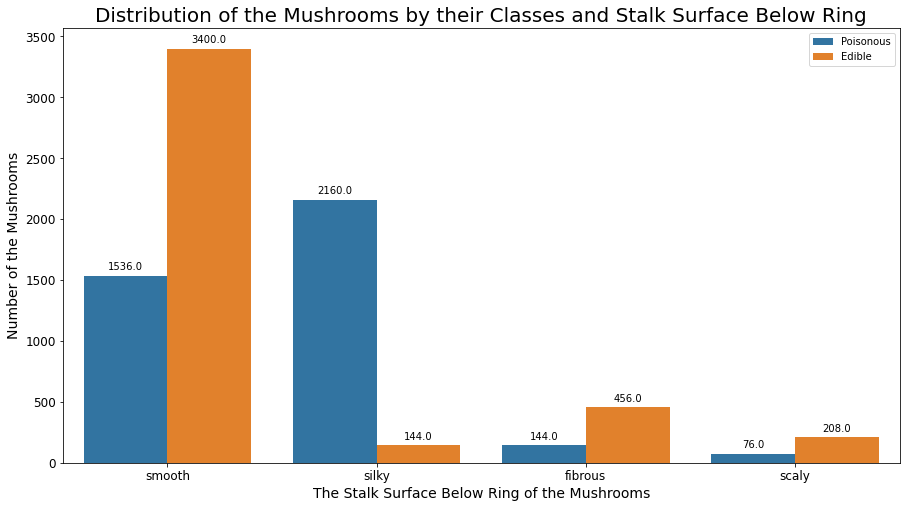

In [17]:
#Distribution of the Mushrooms by their Classes and Stalk Surface Below Ring
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='stalk_surface_below_ring',
                      hue='class',
                      order=df['stalk_surface_below_ring'].value_counts().index)
                      
multi_plot.set_xticklabels(['smooth', 'silky', 'fibrous', 'scaly'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Stalk Surface Below Ring of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Surface Below Ring', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Color Below Ring')

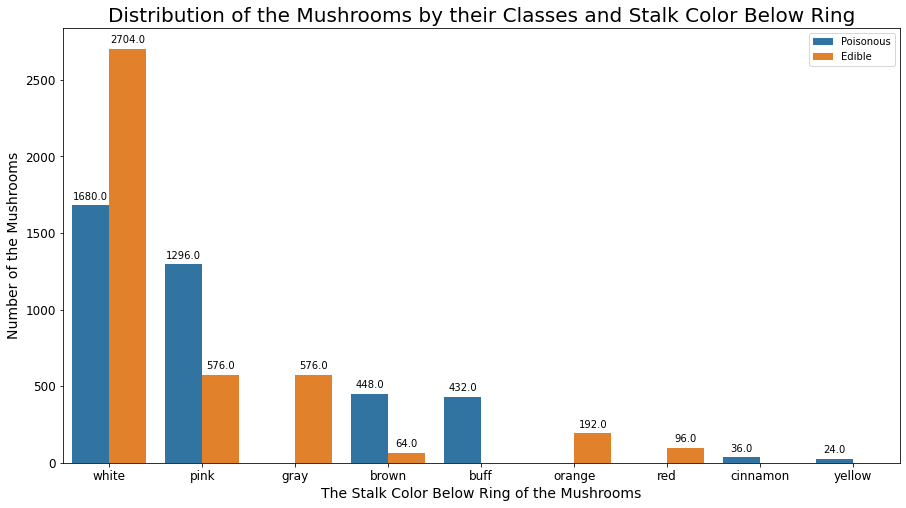

In [48]:
#Distribution of the Mushrooms by their Classes and Stalk Color Below Ring
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='stalk_color_below_ring',
                      hue='class',
                      order=df['stalk_color_below_ring'].value_counts().index)
                      
multi_plot.set_xticklabels(['white', 'pink', 'gray', 'brown', 'buff', 'orange','red','cinnamon','yellow'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Stalk Color Below Ring of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Color Below Ring', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Veil Color')

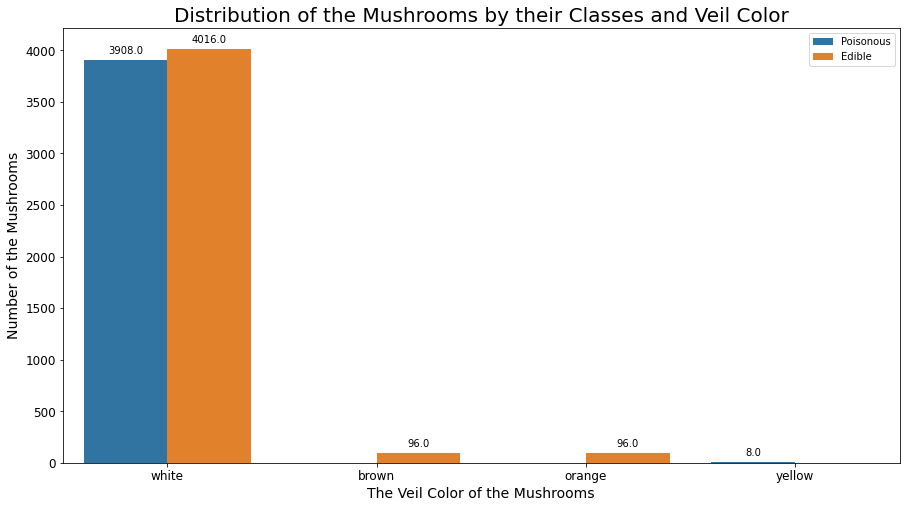

In [19]:
#Distribution of the Mushrooms by their Classes and Veil Color
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='veil_color',
                      hue='class',
                      order=df['veil_color'].value_counts().index)
                      
multi_plot.set_xticklabels(['white', 'brown', 'orange', 'yellow'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Veil Color of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Veil Color', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Ring Numbers')

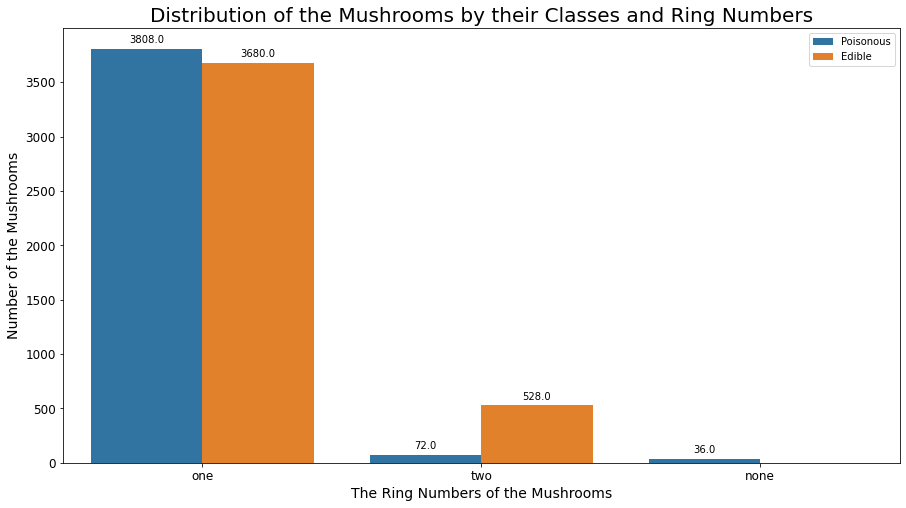

In [20]:
#Distribution of the Mushrooms by their Classes and Ring Numbers
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='ring_number',
                      hue='class',
                      order=df['ring_number'].value_counts().index)
                      
multi_plot.set_xticklabels(['one', 'two', 'none'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Ring Numbers of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Ring Numbers', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Spore Print Color')

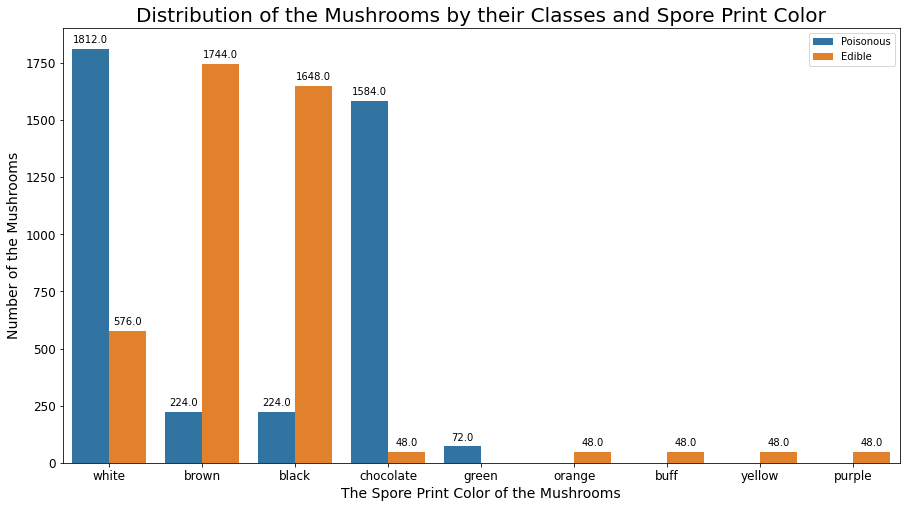

In [21]:
# Distribution of the Mushrooms by their Classes and Spore Print Color
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='spore_print_color',
                      hue='class',
                      order=df['spore_print_color'].value_counts().index)
                      
multi_plot.set_xticklabels(['white', 'brown', 'black', 'chocolate', 'green', 'orange','buff','yellow', 'purple'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Spore Print Color of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Spore Print Color', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Habitat')

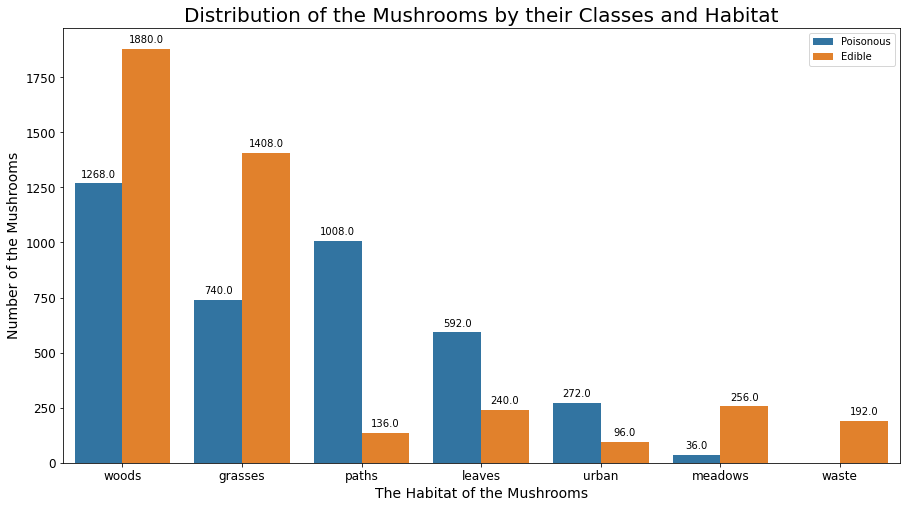

In [22]:
#Distribution of the Mushrooms by their Classes and Habitat
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='habitat',
                      hue='class',
                      order=df['habitat'].value_counts().index)
                      
multi_plot.set_xticklabels(['woods', 'grasses', 'paths', 'leaves', 'urban', 'meadows','waste'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Habitat of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Habitat', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Population')

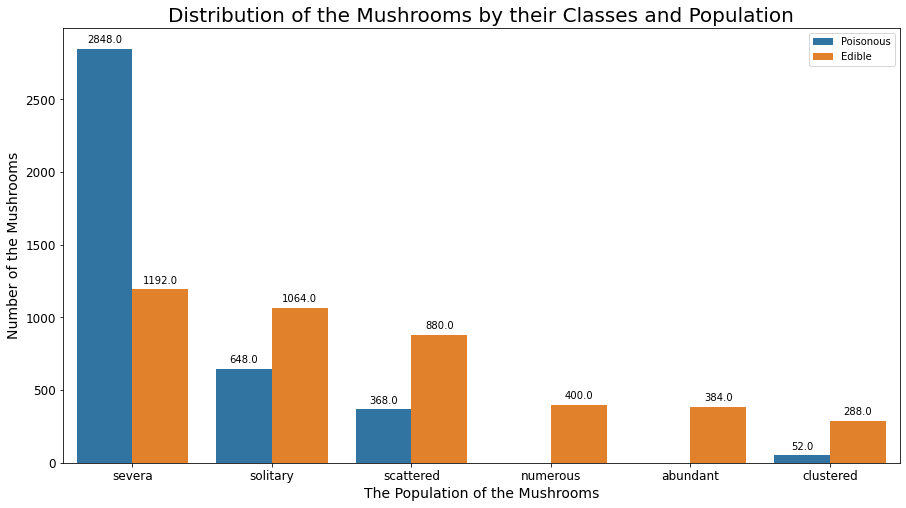

In [23]:
# Distribution of the Mushrooms by their Classes and Population
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='population',
                      hue='class',
                      order=df['population'].value_counts().index)
                      
multi_plot.set_xticklabels(['severa', 'solitary', 'scattered', 'numerous', 'abundant', 'clustered'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Population of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Population', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shape')

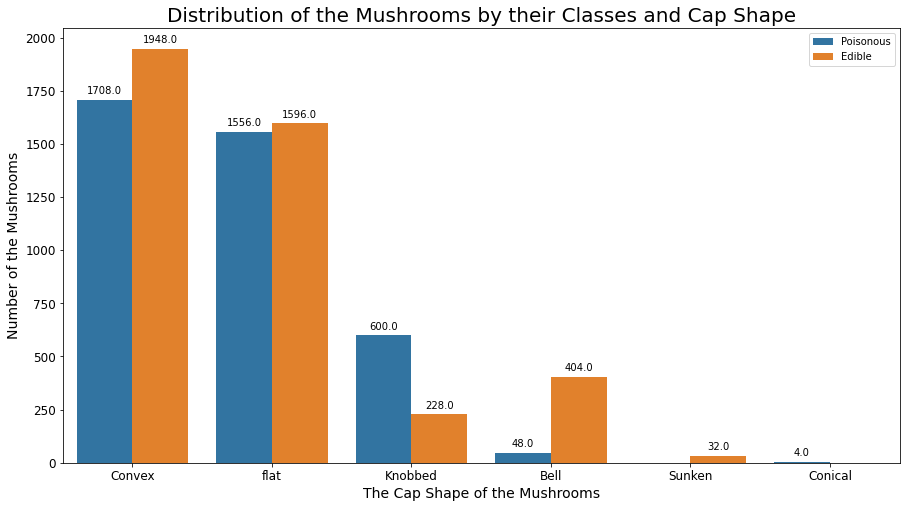

In [24]:
# Distribution of the Mushrooms by their Classes and Cap Shape
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='cap_shape',
                      hue='class',
                      order=df['cap_shape'].value_counts().index)
                      
multi_plot.set_xticklabels(['Convex', 'flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Shape of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shape', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Color')

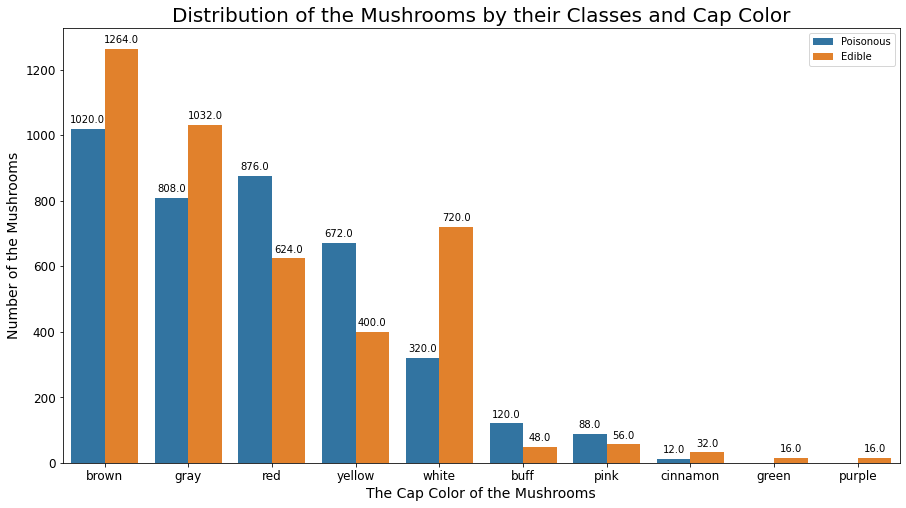

In [25]:
#Distribution of the Mushrooms by their Classes and Cap Color
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='cap_color',
                      hue='class',
                      order=df['cap_color'].value_counts().index)

multi_plot.set_xticklabels(['brown', 'gray', 'red', 'yellow', 'white', 'buff','pink','cinnamon','green','purple'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Color of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Color', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Surface')

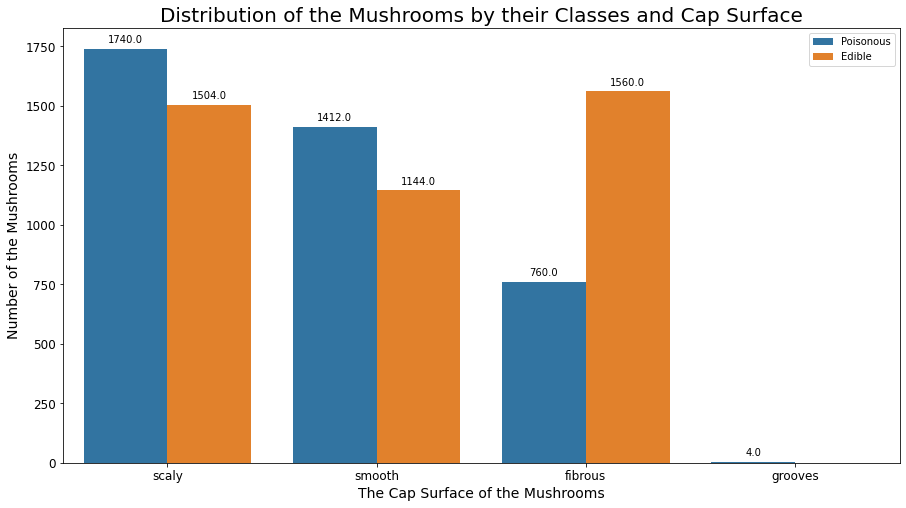

In [49]:
# Distribution of the Mushrooms by their Classes and Cap Surface
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='cap_surface',
                      hue='class',
                      order=df['cap_surface'].value_counts().index)

multi_plot.set_xticklabels(['scaly', 'smooth', 'fibrous', 'grooves'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Surface of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surface', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Bruises')

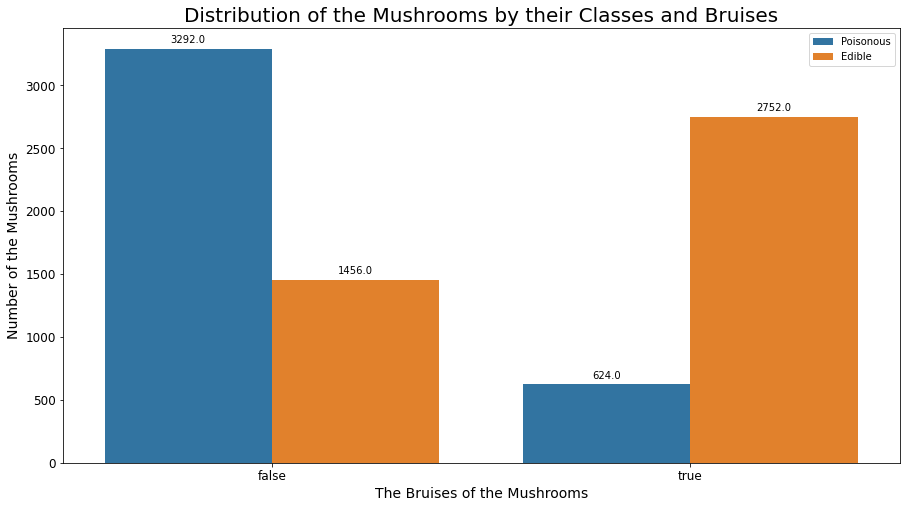

In [27]:
# Distribution of the Mushrooms by their Classes and Bruises
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='bruises',
                      hue='class',
                      order=df['bruises'].value_counts().index)

multi_plot.set_xticklabels(['false', 'true'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Bruises of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Bruises', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Odor')

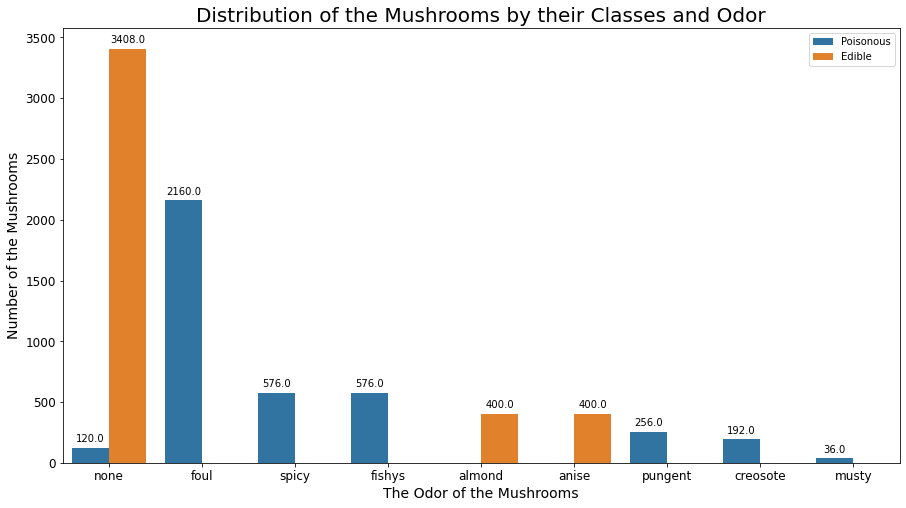

In [28]:
# Distribution of the Mushrooms by their Classes and Odor
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='odor',
                      hue='class',
                      order=df['odor'].value_counts().index)


multi_plot.set_xticklabels(['none', 'foul', 'spicy', 'fishys', 'almond', 'anise', 'pungent', 'creosote','musty'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Odor', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill-Color')

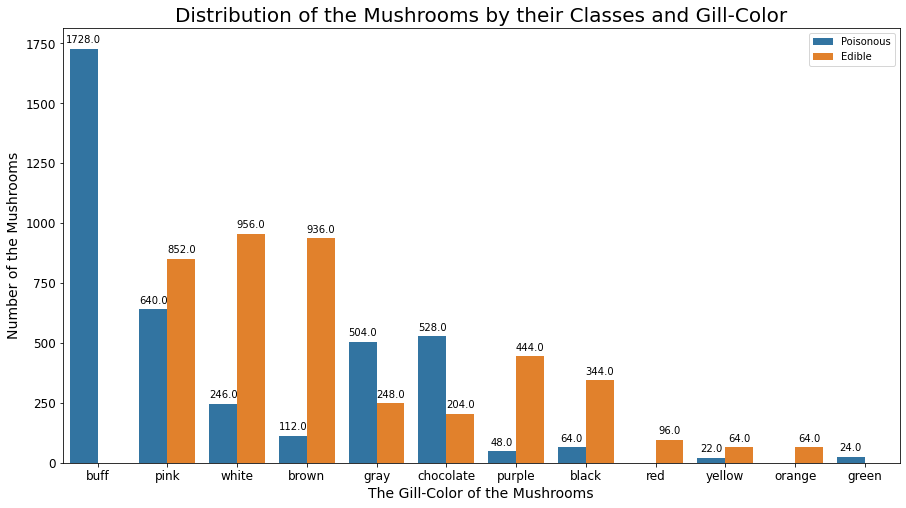

In [29]:
# Distribution of the Mushrooms by their Classes and Gill-Color
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='gill_color',
                      hue='class',
                      order=df['gill_color'].value_counts().index)


multi_plot.set_xticklabels(['buff', 'pink', 'white', 'brown', 'gray', 'chocolate', 'purple', 'black', 'red', 'yellow', 'orange', 'green'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Gill-Color of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill-Color', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill-Spacing')

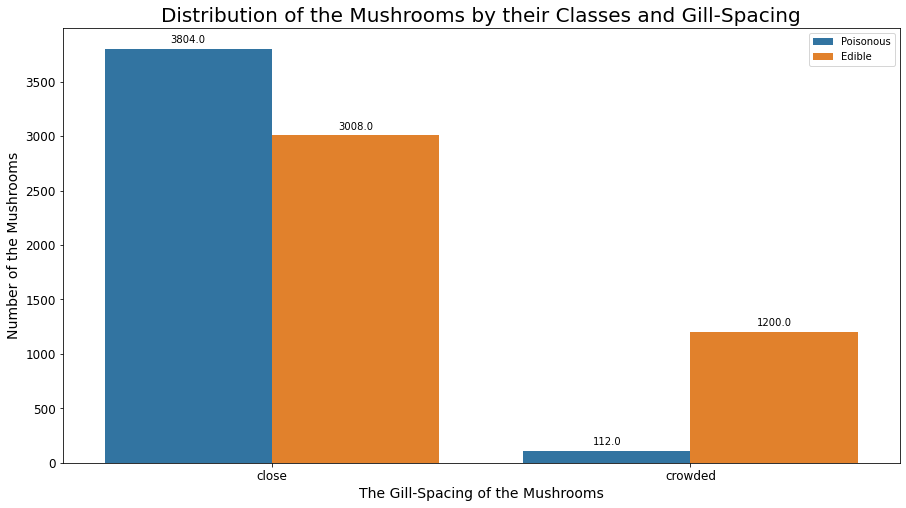

In [30]:
# Distribution of the Mushrooms by their Classes and Gill-Spacing
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='gill_spacing',
                      hue='class',
                      order=df['gill_spacing'].value_counts().index)
#close=c,=w
multi_plot.set_xticklabels(['close', 'crowded'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Gill-Spacing of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill-Spacing', fontsize=20)

In [31]:
# Creating Dummy variables
df1 = pd.get_dummies(df,drop_first=True)
df1

class_p  cap_shape_c  cap_shape_f  cap_shape_k  cap_shape_s  \
0           1            0            0            0            0   
1           0            0            0            0            0   
2           0            0            0            0            0   
3           1            0            0            0            0   
4           0            0            0            0            0   
...       ...          ...          ...          ...          ...   
8119        0            0            0            1            0   
8120        0            0            0            0            0   
8121        0            0            1            0            0   
8122        1            0            0            1            0   
8123        0            0            0            0            0   

      cap_shape_x  cap_surface_g  cap_surface_s  cap_surface_y  cap_color_c  \
0               1              0              1              0            0   
1               1              0              1              0            0   
2               0              0              1              0            0   
3               1              0              0              1            0   
4               1              0              1              0            0   
...           ...            ...            ...            ...          ...   
8119            0              0              1              0            0   
8120            1              0              1              0            0   
8121            0              0              1              0            0   
8122            0              0              0              1            0   
8123            1              0              1              0            0   

      ...  population_n  population_s  population_v  population_y  habitat_g  \
0     ...             0             1             0             0          0   
1     ...             1             0             0             0          1   
2     ...             1             0             0             0          0   
3     ...             0             1             0             0          0   
4     ...             0             0             0             0          1   
...   ...           ...           ...           ...           ...        ...   
8119  ...             0             0             0             0          0   
8120  ...             0             0             1             0          0   
8121  ...             0             0             0             0          0   
8122  ...             0             0             1             0          0   
8123  ...             0             0             0             0          0   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0             0          0          0          1          0  
1             0          0          0          0          0  
2             0          1          0          0          0  
3             0          0          0          1          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
8119          1          0          0          0          0  
8120          1          0          0          0          0  
8121          1          0          0          0          0  
8122          1          0          0          0          0  
8123          1          0          0          0          0  

[8124 rows x 96 columns]

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class_p                     8124 non-null   uint8
 1   cap_shape_c                 8124 non-null   uint8
 2   cap_shape_f                 8124 non-null   uint8
 3   cap_shape_k                 8124 non-null   uint8
 4   cap_shape_s                 8124 non-null   uint8
 5   cap_shape_x                 8124 non-null   uint8
 6   cap_surface_g               8124 non-null   uint8
 7   cap_surface_s               8124 non-null   uint8
 8   cap_surface_y               8124 non-null   uint8
 9   cap_color_c                 8124 non-null   uint8
 10  cap_color_e                 8124 non-null   uint8
 11  cap_color_g                 8124 non-null   uint8
 12  cap_color_n                 8124 non-null   uint8
 13  cap_color_p                 8124 non-null   uint8
 14  cap_colo

In [50]:
#Independent and dependent variables
X = df1.drop("class_p", axis = 1)
y = df1['class_p']

In [37]:
#splitting data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state = 101)

In [38]:
#scaling
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

In [39]:
# Depenent variable observation names
target_names = ['Poison','Edible']

Accuracy: 1.0
--------------------------------------------------------


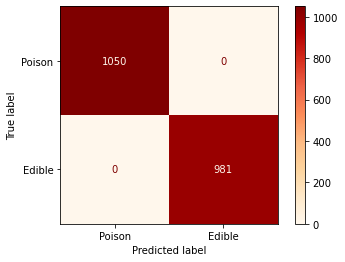

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 265)
log_reg = log_reg.fit(X_train,Y_train)

# Predictions:
y_pred = log_reg.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
disp = plot_confusion_matrix(log_reg, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred))
print("---------------------------------------------------------")
#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred))

# Decision Tree

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


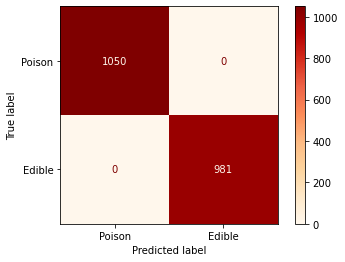

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [69]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 265)
dt = dt.fit(X_train,Y_train)

# Predictions:
y_pred_dt = dt.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_dt))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(dt, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_dt))
print("---------------------------------------------------------")
#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_dt))

## Hyper parameter tuning

In [70]:
leaves = [1,2,4,5,10,20,30,40,80,100]
grid_param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2'],
    'min_samples_leaf':leaves
}

grid_search = GridSearchCV(estimator=dt,param_grid=grid_param_dt,cv=6,n_jobs =-1,verbose = 3)

grid_search.fit(X_train,Y_train)
grid_search.best_params_

Fitting 6 folds for each of 40 candidates, totalling 240 fits


{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1}

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


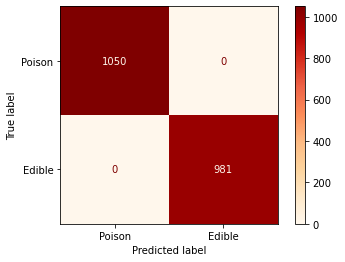

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [72]:
dt1 = DecisionTreeClassifier(criterion = 'gini', max_features = 'log2', min_samples_leaf = 1)
dt1 = dt1.fit(X_train,Y_train)

# Predictions:
y_pred_dt1 = dt1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_dt1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(dt1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_dt1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_dt1))

# Random Forest

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


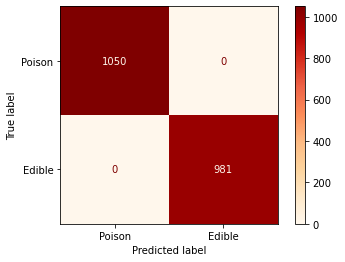

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=265)
rf = rf.fit(X_train,Y_train)

# Predictions:
y_pred_rf = rf.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_rf))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(rf, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_rf))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_rf))

## Tuning

In [54]:
grid_param_rand = {
    "n_estimators" : [10,20,30,40,50,100,150],
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2']
}

grid_search = GridSearchCV(estimator=rf,param_grid=grid_param_rand,cv=6,n_jobs =-1,verbose = 3)

grid_search.fit(X_train,Y_train)
grid_search.best_params_

Fitting 6 folds for each of 28 candidates, totalling 168 fits


{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


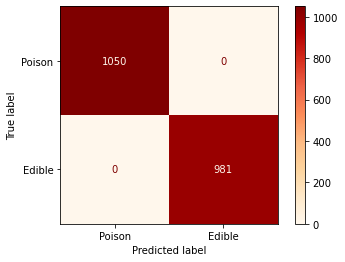

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [55]:
rf1 = RandomForestClassifier(criterion = "gini",
                             max_features = "auto",
                             n_estimators = 10)
rf1 = rf1.fit(X_train,Y_train)

# Predictions:
y_pred_rf1 = rf1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_rf1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(rf1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_rf1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_rf1))

In [56]:
filename = 'mushrooms.pkl'
pickle.dump(rf1, open(filename, 'wb'))

## Ada Boost

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


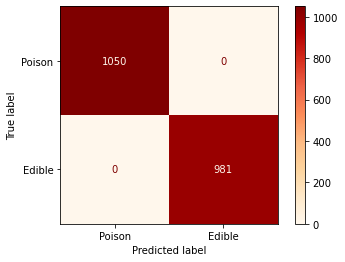

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=265)
ada = ada.fit(X_train,Y_train)

# Predictions:
y_pred_ada = ada.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_ada))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(ada, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_ada))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_ada))

## Parameter Tuning

In [85]:
grid_param_ada={
    'n_estimators':[500,1000,1500,2000],
    'learning_rate':[0.001,0.01,0.1]
}

grid_search_ada = GridSearchCV(estimator=ada,
                               param_grid=grid_param_ada,
                               cv=5,n_jobs =-1,
                               verbose = 3)

grid_search_ada.fit(X_train,Y_train)
grid_search_ada.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 0.01, 'n_estimators': 2000}

Accuracy: 0.999507631708518
--------------------------------------------------------
Confusion Matrix


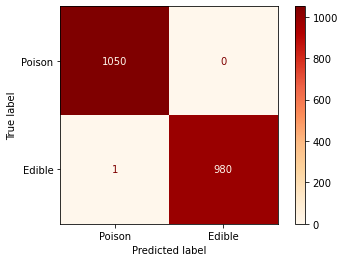

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 0.9994903160040775


In [88]:
ada1 = AdaBoostClassifier(n_estimators = 2000,learning_rate = 0.01,random_state=265)
ada1 = ada1.fit(X_train,Y_train)

# Predictions:
y_pred_ada1 = ada1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_ada1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(ada1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_ada1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_ada1))

## Gradient Boosting

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


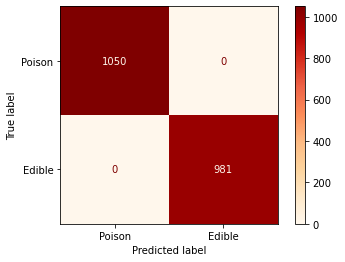

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=265)
grad = grad.fit(X_train,Y_train)

# Predictions:
y_pred_grad = grad.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_grad))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(grad, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_grad))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_grad))

## Hyper parameter tuning

In [90]:
grid_param_grad = {
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,.1]
}

grid_search_grad = GridSearchCV(estimator=grad,
                              param_grid=grid_param_grad,
                              cv=5,n_jobs =-1,
                              verbose = 3)

grid_search_grad.fit(X_train,Y_train)
grid_search_grad.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'learning_rate': 0.01, 'n_estimators': 500}

Accuracy: 0.999507631708518
--------------------------------------------------------
Confusion Matrix


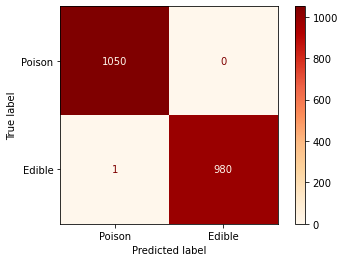

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 0.9994903160040775


In [91]:
grad1 = GradientBoostingClassifier(n_estimators = 500,learning_rate = 0.01,random_state=265)
grad1 = grad1.fit(X_train,Y_train)

# Predictions:
y_pred_grad1 = grad1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_grad1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(grad1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_grad1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_grad1))

## XG Boosting

Accuracy: 0.999507631708518
--------------------------------------------------------
Confusion Matrix


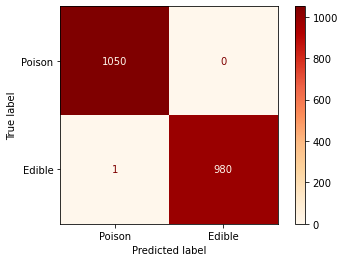

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 0.9994903160040775


In [92]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=265)
xgb = grad1.fit(X_train,Y_train)

# Predictions:
y_pred_xgb = xgb.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_xgb))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(xgb, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_xgb))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_xgb))

## Hyper parameter Tuning

In [93]:
grid_param_xgb = {
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,.1]
}

grid_search_xgb = GridSearchCV(estimator=xgb,
                               param_grid=grid_param_xgb,
                               cv=5,n_jobs =-1,
                               verbose = 3)

grid_search_xgb.fit(X_train,Y_train)
grid_search_xgb.best_params_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'learning_rate': 0.01, 'n_estimators': 500}

Accuracy: 0.999507631708518
--------------------------------------------------------
Confusion Matrix


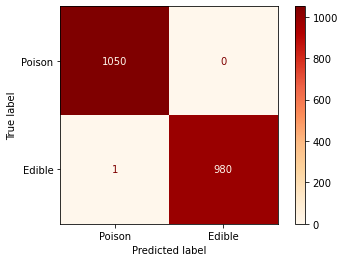

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 0.9994903160040775


In [96]:
xgb1 = XGBClassifier(learning_rate = 0.01, n_estimators = 500,random_state=265)
xgb1 = grad1.fit(X_train,Y_train)

# Predictions:
y_pred_xgb1 = xgb1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_xgb1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(xgb1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_xgb1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_xgb1))

## KNN

Accuracy: 0.999507631708518
--------------------------------------------------------
Confusion Matrix


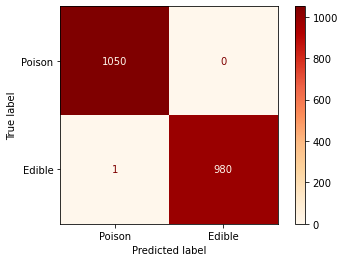

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 0.9994903160040775


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
knn = KNeighborsClassifier()
knn = knn.fit(X_train,Y_train)

# Predictions:
y_pred_knn = knn.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_knn))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(knn, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_knn))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_knn))

## Hyper parameter tuning

In [42]:
param_grid = {'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

gridsearch = GridSearchCV(knn, param_grid,verbose=3)

gridsearch.fit(X_train,Y_train)
gridsearch.best_params_

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.998 total time=   1.8s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=1.000 total time=   1.6s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=1.000 total time=   1.6s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=1.000 total time=   1.6s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=1.000 total time=   1.6s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.997 total time=   1.6s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=1.000 total time=   1.6s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=1.000 total time=   1.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=1.000 total time=   1.4s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=1.000 total 

[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=1.000 total time=   1.6s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=1.000 total time=   1.5s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=1.000 total time=   0.9s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=1.000 total time=   1.5s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.997 total time=   1.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=1.000 total time=   1.9s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=1.000 total time=   1.7s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=1.000 total time=   1.4s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=1.000 total time=   1.4s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.997 total time=   1.6s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_

[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7;, score=1.000 total time=   0.9s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7;, score=1.000 total time=   1.6s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7;, score=1.000 total time=   1.3s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.997 total time=   1.6s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=1.000 total time=   1.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=1.000 total time=   1.5s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=1.000 total time=   1.5s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.999 total time=   1.5s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.997 total time=   1.5s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=1.000 total time=   1.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, 

[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=9;, score=1.000 total time=   1.3s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=9;, score=0.999 total time=   1.6s
[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=10;, score=0.997 total time=   1.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=10;, score=1.000 total time=   1.2s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=10;, score=0.999 total time=   1.5s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=10;, score=1.000 total time=   1.5s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=10;, score=0.999 total time=   1.5s
[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=11;, score=0.997 total time=   1.5s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=11;, score=1.000 total time=   1.2s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=11;, score=0.999 total time=   1.2s
[CV 4/5] END algorithm=ball_tree, leaf_siz

[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=1.000 total time=   1.9s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.999 total time=   2.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=1.000 total time=   1.8s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.999 total time=   1.8s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.997 total time=   1.9s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=1.000 total time=   1.5s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.999 total time=   1.9s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=1.000 total time=   1.8s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.999 total time=   1.9s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.997 total time=   2.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13

[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.999 total time=   1.3s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.997 total time=   1.9s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=1.000 total time=   1.7s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.999 total time=   1.7s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=1.000 total time=   2.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.999 total time=   1.8s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.998 total time=   1.7s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=1.000 total time=   1.6s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=1.000 total time=   1.5s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=1.000 total time=   1.4s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, sc

[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3;, score=1.000 total time=   2.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3;, score=1.000 total time=   2.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3;, score=1.000 total time=   2.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=0.997 total time=   2.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=1.000 total time=   1.7s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=1.000 total time=   1.8s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=1.000 total time=   1.6s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=1.000 total time=   2.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.997 total time=   2.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=1.000 total time=   2.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=1.

[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=1.000 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=1.000 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=1.000 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=1.000 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.997 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=1.000 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=1.000 total time=   0.3s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=1.000 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.999 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.997 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=1.000 total time=   0.

[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=1.000 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=0.999 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=1.000 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=0.999 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=0.997 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=1.000 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=0.999 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=1.000 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=0.999 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.997 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=1.000 total t

[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=12;, score=1.000 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=12;, score=0.999 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=12;, score=1.000 total time=   0.3s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=12;, score=0.999 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=0.997 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=1.000 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=0.999 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=1.000 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=0.999 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.998 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=1.000 total tim

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

## Naive Bayes

Accuracy: 0.9453471196454948
--------------------------------------------------------
Confusion Matrix


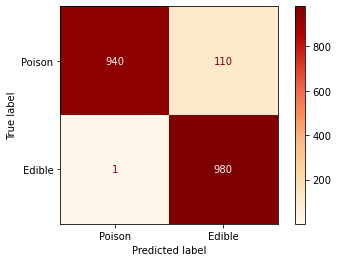

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1050
           1       0.90      1.00      0.95       981

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

---------------------------------------------------------
AUC Score: 0.9471093636231251


In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train,Y_train)

# Predictions:
y_pred_nb = nb.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_nb))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(nb, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_nb))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_nb))

## SVM

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


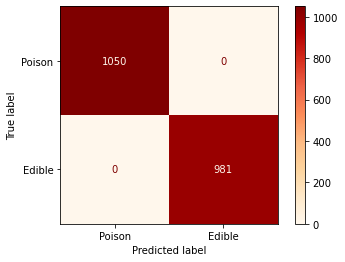

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [44]:
from sklearn.svm import SVC

svm = SVC(probability = True, random_state = 265)
svm = svm.fit(X_train,Y_train)

# Predictions:
y_pred_svm = svm.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_svm))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(svm, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_svm))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_svm))

## Hyper parameter Tuning

In [45]:
param_grid={
    'C':[0.1,1,0.2,0.5],
    'gamma':[1,0.5,0.001,0.01,0.1]
}

grid= GridSearchCV(svm,param_grid, verbose=3, n_jobs=-1)

grid.fit(X_train,Y_train)
grid.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 1, 'gamma': 0.001}

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


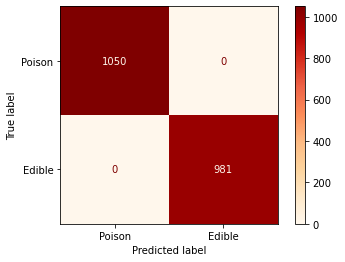

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [46]:
from sklearn.svm import SVC

svm1 = SVC(C = 1,gamma = 0.001,probability = True)
svm1 = svm.fit(X_train,Y_train)

# Predictions:
y_pred_svm1 = svm1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_svm1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(svm1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_svm1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_svm1))